## Getting Moving Average For Markets

#### Importing Dependencies

In [3]:
import tradingeconomics as te
from stockstats import StockDataFrame
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

#### API login


In [15]:
te.login("jupyter:jupyter") # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

### Importing and Treating Data

In [10]:
symbol="AAPL:US"
total_days_interval = 180
initDate = str((datetime.today() - timedelta(days=total_days_interval)).date())
endDate = str((datetime.now() + timedelta(days=1)).date())


In [11]:
df = te.fetchMarkets(symbol=symbol, initDate=initDate, endDate=endDate, output_type="df")

In [12]:
stock_df = StockDataFrame.retype(df)

In [48]:
stock_df

,symbol,open,high,low,close
2021-08-02,AAPL:US,146.360,146.950,145.25,145.52
2021-07-30,AAPL:US,144.380,146.330,144.11,145.86
2021-07-29,AAPL:US,144.685,146.550,144.58,145.64
2021-07-28,AAPL:US,144.810,146.970,142.54,144.98
2021-07-27,AAPL:US,149.120,149.210,145.55,146.77
...,...,...,...,...,...
2021-02-10,AAPL:US,136.480,136.990,134.40,135.39
2021-02-09,AAPL:US,136.620,137.877,135.85,136.01
2021-02-08,AAPL:US,136.030,136.960,134.92,136.91
2021-02-05,AAPL:US,137.350,137.420,135.86,136.76


#### Plot Request


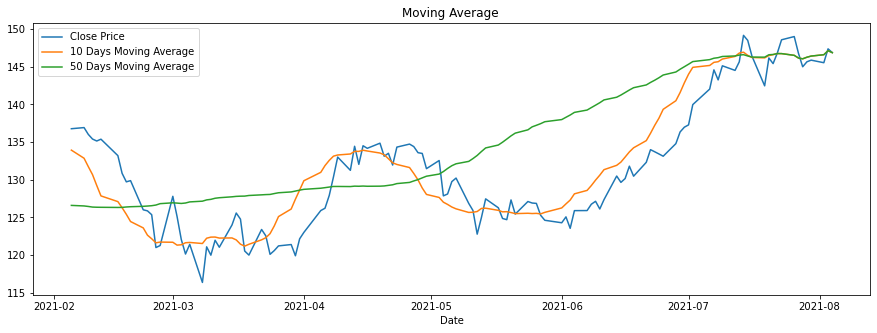

In [14]:
fig, ax = plt.subplots(figsize=(15,5))  # Create a figure and an axes.
ax.plot(stock_df['close'], label='Close Price')  # Plot some data on the axes.
ax.plot(stock_df['close_10_sma'], label='10 Days Moving Average')  # Plot some data on the axes.
ax.plot(stock_df['close_50_sma'], label='50 Days Moving Average')  # Plot some data on the axes.

ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('')  # Add a y-label to the axes.
ax.set_title("Moving Average ")  # Add a title to the axes.
ax.legend()  # Add a legend.